# 데이터 파일 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.preprocessing import StandardScaler #표준화
from sklearn.preprocessing import MinMaxScaler #정규화

from sklearn.model_selection import train_test_split #훈련분리


import tensorflow as tf
from tensorflow.keras.layers import * #케라스
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.models import Sequential


# 경고문구 삭제

import warnings
warnings.filterwarnings('ignore')


In [2]:

# import FinanceDataReader as fdr
# import exchange_calendars as ecals 

# #맷플롯 한글화
# import matplotlib as mpl
# import matplotlib.font_manager as fm

# mpl.rcParams['axes.unicode_minus']= False

# path = 'C:/Windows/Fonts/malgun.ttf'
# font_name = fm.FontProperties(fname = path, size = 50).get_name()
# plt.rc('font', family=font_name)



In [4]:
import io #코랩

from google.colab import drive #코랩파일열기
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
#연속데이터 (시계열 : 회귀모델사용)

In [6]:
#회귀 LSTM사용.

# 구글코랩 사용

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 표준화구현

In [8]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/증권4개년_4차프로젝트_표준화.csv')
df

Date     Close      Open  ...     일간가격차         갭       일변동
0    2017-01-02 -1.064176 -1.087756  ...       NaN       NaN  0.221806
1    2017-01-03 -0.975624 -1.027654  ...  0.739014  0.447457  0.221806
2    2017-01-04 -0.967320 -0.968051  ...  0.035125  0.052822 -4.508446
3    2017-01-05 -0.985667 -0.971882  ... -0.198633 -0.112343 -4.508446
4    2017-01-06 -0.950018 -0.958996  ...  0.274988  0.312753 -4.508446
..          ...       ...       ...  ...       ...       ...       ...
976  2020-12-23  2.583614  2.472105  ...  1.102298  0.170603  0.221806
977  2020-12-24  2.817499  2.595790  ...  2.013779  0.083960  0.221806
978  2020-12-28  2.826150  2.886097  ...  0.038177  0.849538  0.221806
979  2020-12-29  2.885367  2.834354  ...  0.481707  0.027777  0.221806
980  2020-12-30  3.148686  2.883162  ...  2.271959 -0.114373  0.221806

[981 rows x 57 columns]

In [10]:
df1=df.iloc[:,1:] #Date 칼럼 뺀다
df1.head()

Close      Open      High  ...     일간가격차         갭       일변동
0 -1.064176 -1.087756 -1.102409  ...       NaN       NaN  0.221806
1 -0.975624 -1.027654 -1.040884  ...  0.739014  0.447457  0.221806
2 -0.967320 -0.968051 -1.029762  ...  0.035125  0.052822 -4.508446
3 -0.985667 -0.971882 -1.028710  ... -0.198633 -0.112343 -4.508446
4 -0.950018 -0.958996 -1.001955  ...  0.274988  0.312753 -4.508446

[5 rows x 56 columns]

In [11]:
ss = StandardScaler() #표준화
ss_df = ss.fit(df1)
ss_df1= ss.transform(df1)
ss_df1

array([[-1.06417576, -1.08775583, -1.10240926, ...,         nan,
                nan,  0.22180591],
       [-0.97562366, -1.02765449, -1.04088427, ...,  0.73901449,
         0.44745717,  0.22180591],
       [-0.96732035, -0.96805067, -1.02976167, ...,  0.03512463,
         0.05282201, -4.50844618],
       ...,
       [ 2.82615   ,  2.88609729,  2.91976173, ...,  0.03817743,
         0.84953828,  0.22180591],
       [ 2.88536704,  2.83435441,  2.86389825, ...,  0.48170655,
         0.02777656,  0.22180591],
       [ 3.14868646,  2.88316188,  3.1383057 , ...,  2.27195926,
        -0.11437333,  0.22180591]])

In [12]:
df1

Close      Open      High  ...     일간가격차         갭       일변동
0   -1.064176 -1.087756 -1.102409  ...       NaN       NaN  0.221806
1   -0.975624 -1.027654 -1.040884  ...  0.739014  0.447457  0.221806
2   -0.967320 -0.968051 -1.029762  ...  0.035125  0.052822 -4.508446
3   -0.985667 -0.971882 -1.028710  ... -0.198633 -0.112343 -4.508446
4   -0.950018 -0.958996 -1.001955  ...  0.274988  0.312753 -4.508446
..        ...       ...       ...  ...       ...       ...       ...
976  2.583614  2.472105  2.591545  ...  1.102298  0.170603  0.221806
977  2.817499  2.595790  2.807383  ...  2.013779  0.083960  0.221806
978  2.826150  2.886097  2.919762  ...  0.038177  0.849538  0.221806
979  2.885367  2.834354  2.863898  ...  0.481707  0.027777  0.221806
980  3.148686  2.883162  3.138306  ...  2.271959 -0.114373  0.221806

[981 rows x 56 columns]

In [13]:
m2 = pd.DataFrame(ss_df1) #표준화 거친 데이터 df화
m2.index = df1.index #인덱스명 적용
m2.columns= df1.columns #칼럼명 적용

In [14]:
m2

Close      Open      High  ...     일간가격차         갭       일변동
0   -1.064176 -1.087756 -1.102409  ...       NaN       NaN  0.221806
1   -0.975624 -1.027654 -1.040884  ...  0.739014  0.447457  0.221806
2   -0.967320 -0.968051 -1.029762  ...  0.035125  0.052822 -4.508446
3   -0.985667 -0.971882 -1.028710  ... -0.198633 -0.112343 -4.508446
4   -0.950018 -0.958996 -1.001955  ...  0.274988  0.312753 -4.508446
..        ...       ...       ...  ...       ...       ...       ...
976  2.583614  2.472105  2.591545  ...  1.102298  0.170603  0.221806
977  2.817499  2.595790  2.807383  ...  2.013779  0.083960  0.221806
978  2.826150  2.886097  2.919762  ...  0.038177  0.849538  0.221806
979  2.885367  2.834354  2.863898  ...  0.481707  0.027777  0.221806
980  3.148686  2.883162  3.138306  ...  2.271959 -0.114373  0.221806

[981 rows x 56 columns]

In [15]:
m1=df['Date']

In [16]:
표준화df=pd.concat([m1,m2],axis=1)
표준화df

Date     Close      Open  ...     일간가격차         갭       일변동
0    2017-01-02 -1.064176 -1.087756  ...       NaN       NaN  0.221806
1    2017-01-03 -0.975624 -1.027654  ...  0.739014  0.447457  0.221806
2    2017-01-04 -0.967320 -0.968051  ...  0.035125  0.052822 -4.508446
3    2017-01-05 -0.985667 -0.971882  ... -0.198633 -0.112343 -4.508446
4    2017-01-06 -0.950018 -0.958996  ...  0.274988  0.312753 -4.508446
..          ...       ...       ...  ...       ...       ...       ...
976  2020-12-23  2.583614  2.472105  ...  1.102298  0.170603  0.221806
977  2020-12-24  2.817499  2.595790  ...  2.013779  0.083960  0.221806
978  2020-12-28  2.826150  2.886097  ...  0.038177  0.849538  0.221806
979  2020-12-29  2.885367  2.834354  ...  0.481707  0.027777  0.221806
980  2020-12-30  3.148686  2.883162  ...  2.271959 -0.114373  0.221806

[981 rows x 57 columns]

In [17]:
표준화df.to_csv('/content/drive/MyDrive/Colab Notebooks/증권4개년_4차프로젝트_표준화.csv', encoding='utf-8-sig', index=False)

In [18]:
# 표준화df.to_csv('./전처리 데이터/증권4개년_4차프로젝트_표준화.csv', encoding='utf-8-sig', index=False)

In [21]:
표준화df

Date     Close      Open  ...     일간가격차         갭       일변동
0    2017-01-02 -1.064176 -1.087756  ...       NaN       NaN  0.221806
1    2017-01-03 -0.975624 -1.027654  ...  0.739014  0.447457  0.221806
2    2017-01-04 -0.967320 -0.968051  ...  0.035125  0.052822 -4.508446
3    2017-01-05 -0.985667 -0.971882  ... -0.198633 -0.112343 -4.508446
4    2017-01-06 -0.950018 -0.958996  ...  0.274988  0.312753 -4.508446
..          ...       ...       ...  ...       ...       ...       ...
976  2020-12-23  2.583614  2.472105  ...  1.102298  0.170603  0.221806
977  2020-12-24  2.817499  2.595790  ...  2.013779  0.083960  0.221806
978  2020-12-28  2.826150  2.886097  ...  0.038177  0.849538  0.221806
979  2020-12-29  2.885367  2.834354  ...  0.481707  0.027777  0.221806
980  2020-12-30  3.148686  2.883162  ...  2.271959 -0.114373  0.221806

[981 rows x 57 columns]

In [22]:
표준화df1= 표준화df.dropna(axis=0)


In [23]:
표준화df1.reset_index(drop=True, inplace=True) #인덱스 재지정 : drop 원래인덱스 살려라 , inplace 해당값에 영구저장
표준화df1

Date     Close      Open  ...     일간가격차         갭       일변동
0    2017-09-21  0.826891  0.851508  ... -0.286292 -0.117081  0.221806
1    2017-09-22  0.738439  0.813397  ... -0.813555 -0.249754  0.221806
2    2017-09-25  0.697121  0.735882  ... -0.400118 -0.100158  0.221806
3    2017-09-26  0.666891  0.650556  ... -0.302865 -0.698542  0.221806
4    2017-09-27  0.658190  0.676776  ... -0.114027  0.069745 -4.508446
..          ...       ...       ...  ...       ...       ...       ...
797  2020-12-23  2.583614  2.472105  ...  1.102298  0.170603  0.221806
798  2020-12-24  2.817499  2.595790  ...  2.013779  0.083960  0.221806
799  2020-12-28  2.826150  2.886097  ...  0.038177  0.849538  0.221806
800  2020-12-29  2.885367  2.834354  ...  0.481707  0.027777  0.221806
801  2020-12-30  3.148686  2.883162  ...  2.271959 -0.114373  0.221806

[802 rows x 57 columns]

# 표준화로 딥 러닝한 결과가 좋지않아 데이터를 정규화 시킴

In [24]:
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/증권4개년_4차프로젝트_감성어.csv')
df2

Date    Close     Open     High  ...  장중가격차  일간가격차      갭  일변동
0    2017-01-02  2026.16  2022.23  2031.79  ...  16.11    NaN    NaN  1.0
1    2017-01-03  2043.97  2034.31  2044.07  ...  15.60  17.81   8.15  1.0
2    2017-01-04  2045.64  2046.29  2046.29  ...   5.68   1.67   2.32  0.0
3    2017-01-05  2041.95  2045.52  2046.50  ...   7.01  -3.69  -0.12  0.0
4    2017-01-06  2049.12  2048.11  2051.84  ...   6.18   7.17   6.16  0.0
..          ...      ...      ...      ...  ...    ...    ...    ...  ...
976  2020-12-23  2759.82  2737.74  2769.08  ...  52.80  26.14   4.06  1.0
977  2020-12-24  2806.86  2762.60  2812.16  ...  49.56  47.04   2.78  1.0
978  2020-12-28  2808.60  2820.95  2834.59  ...  35.03   1.74  14.09  1.0
979  2020-12-29  2820.51  2810.55  2823.44  ...  31.38  11.91   1.95  1.0
980  2020-12-30  2873.47  2820.36  2878.21  ...  68.86  52.96  -0.15  1.0

[981 rows x 57 columns]

In [25]:
df3=df2.iloc[:,1:] #Date 칼럼 뺀다
df3.head()

Close     Open     High      Low     Volume  ...  비율점수  장중가격차  일간가격차     갭  일변동
0  2026.16  2022.23  2031.79  2015.68  229880000  ...   NaN  16.11    NaN   NaN  1.0
1  2043.97  2034.31  2044.07  2028.47  268130000  ...   0.0  15.60  17.81  8.15  1.0
2  2045.64  2046.29  2046.29  2040.61  371490000  ...   1.0   5.68   1.67  2.32  0.0
3  2041.95  2045.52  2046.50  2039.49  541340000  ...   1.0   7.01  -3.69 -0.12  0.0
4  2049.12  2048.11  2051.84  2045.66  455350000  ...   1.0   6.18   7.17  6.16  0.0

[5 rows x 56 columns]

In [26]:
mm=MinMaxScaler() #정규화
mm.fit(df3)
mm1=mm.transform(df3)
m3=pd.DataFrame(mm1)
m3.index=df3.index
m3.columns=df3.columns

In [27]:
m4=df2['Date']

In [28]:
정규화df=pd.concat([m4,m3],axis=1)

In [29]:
정규화df1= 정규화df.dropna(axis=0)
정규화df1


Date     Close      Open  ...     일간가격차         갭  일변동
179  2017-09-21  0.670179  0.696294  ...  0.489754  0.614172  1.0
180  2017-09-22  0.657614  0.690605  ...  0.443444  0.603372  1.0
181  2017-09-25  0.651745  0.679035  ...  0.479756  0.615550  1.0
182  2017-09-26  0.647451  0.666298  ...  0.488298  0.566839  1.0
183  2017-09-27  0.646215  0.670212  ...  0.504884  0.629381  0.0
..          ...       ...       ...  ...       ...       ...  ...
976  2020-12-23  0.919729  0.938203  ...  0.611713  0.637591  1.0
977  2020-12-24  0.952953  0.956665  ...  0.691768  0.630538  1.0
978  2020-12-28  0.954182  1.000000  ...  0.518252  0.692859  1.0
979  2020-12-29  0.962594  0.992276  ...  0.557207  0.625964  1.0
980  2020-12-30  1.000000  0.999562  ...  0.714444  0.614393  1.0

[802 rows x 57 columns]

In [30]:
정규화df1.reset_index(drop=True, inplace=True) #인덱스 재지정 : drop 원래인덱스 살려라 , inplace 해당값에 영구저장

In [32]:
정규화df1.to_csv('/content/drive/MyDrive/Colab Notebooks/증권4개년_4차프로젝트_정규화.csv', encoding='utf-8-sig', index=False)

In [33]:
정규화df1

Date     Close      Open  ...     일간가격차         갭  일변동
0    2017-09-21  0.670179  0.696294  ...  0.489754  0.614172  1.0
1    2017-09-22  0.657614  0.690605  ...  0.443444  0.603372  1.0
2    2017-09-25  0.651745  0.679035  ...  0.479756  0.615550  1.0
3    2017-09-26  0.647451  0.666298  ...  0.488298  0.566839  1.0
4    2017-09-27  0.646215  0.670212  ...  0.504884  0.629381  0.0
..          ...       ...       ...  ...       ...       ...  ...
797  2020-12-23  0.919729  0.938203  ...  0.611713  0.637591  1.0
798  2020-12-24  0.952953  0.956665  ...  0.691768  0.630538  1.0
799  2020-12-28  0.954182  1.000000  ...  0.518252  0.692859  1.0
800  2020-12-29  0.962594  0.992276  ...  0.557207  0.625964  1.0
801  2020-12-30  1.000000  0.999562  ...  0.714444  0.614393  1.0

[802 rows x 57 columns]

# LSTM 구현

In [87]:
x=정규화df1[['감성어점수','감성어_Change','감성어5일_Change',\
        '감성어5일이동평균'\
   ,'긍정비율','부정비율','중립비율','비율점수']]

y=정규화df1['종가증감']  #상승하면 +값, 하락하면 -값



In [89]:
기간=10 #window_size

In [90]:
x

감성어점수  감성어_Change  감성어5일_Change  ...    부정비율    중립비율    비율점수
0   0.45614     0.40771       0.65424  ... 0.27515 0.61796 0.50000
1   0.38847     0.40527       0.63577  ... 0.40449 0.55312 0.50000
2   0.48421     0.45562       0.63954  ... 0.26462 0.59609 0.50000
3   0.48221     0.41380       0.64038  ... 0.28816 0.50551 0.50000
4   0.52782     0.41863       0.65066  ... 0.19180 0.54497 1.00000
..      ...         ...           ...  ...     ...     ...     ...
797 0.51429     0.41793       0.64400  ... 0.19815 0.51424 1.00000
798 0.54035     0.41610       0.64679  ... 0.11118 0.46892 1.00000
799 0.62607     0.41990       0.64911  ... 0.10728 0.41517 1.00000
800 0.51830     0.40897       0.64704  ... 0.14727 0.50401 1.00000
801 0.52431     0.41447       0.64441  ... 0.12388 0.57210 1.00000

[802 rows x 8 columns]

In [91]:
x.iloc[0:0+기간,:].values

array([[0.45614035, 0.40771092, 0.65423634, 0.50758545, 0.34374574,
        0.27515378, 0.61796336, 0.5       ],
       [0.38847118, 0.40526792, 0.63576758, 0.52622921, 0.26403871,
        0.40449136, 0.55312132, 0.5       ],
       [0.48421053, 0.45561872, 0.63954181, 0.453482  , 0.370333  ,
        0.26461643, 0.59609403, 0.5       ],
       [0.48220551, 0.41380043, 0.6403844 , 0.41418388, 0.41412357,
        0.28815909, 0.50551159, 0.5       ],
       [0.52781955, 0.41863281, 0.6506628 , 0.3876805 , 0.48005288,
        0.19180316, 0.54497045, 1.        ],
       [0.53533835, 0.41455687, 0.69109018, 0.41381831, 0.51663462,
        0.18244489, 0.50802258, 1.        ],
       [0.51528822, 0.41258132, 0.64611204, 0.46737342, 0.49197471,
        0.17784219, 0.54748592, 1.        ],
       [0.66566416, 0.42602013, 0.6576087 , 0.4787059 , 0.42412042,
        0.17425696, 0.64396027, 0.5       ],
       [0.59949875, 0.41131314, 0.64773873, 0.54560409, 0.65673137,
        0.10078845, 0.427648

In [92]:
x리스트 = []
y리스트 = []

In [93]:
for i in range(len(x)-기간) :
    x리스트.append(x.iloc[i:i+기간, :].values.tolist())
    y리스트.append(y[i])


In [95]:
x값=np.array(x리스트)

In [97]:
y값=np.array(y리스트)

In [99]:
# x_train, x_test, y_train, y_test = train_test_split(x값,y값, test_size=0.2, random_state=42)

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# # print(y_test.shape) 시계열데이터는 random분할 안되서 다른방법 사용

# train데이터와 test 데이터 분리

In [100]:
기준=600

x_train = x값[:기준, :]
y_train = y값[:기준]

x_test = x값[기준:, :]
y_test = y값[기준:]

In [102]:
activation= tf.nn.leaky_relu

In [131]:
model = Sequential()
model.add( LSTM(600, input_shape=(10,8), activation=activation))
# model.add(Dropout(0.2)) #학습시 20%는 빼고 학습시킨다


# model.add(Dense(128, activation=activation))


model.add(Dense(1, activation='sigmoid') )
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 600)               1461600   
                                                                 
 dense_10 (Dense)            (None, 1)                 601       
                                                                 
Total params: 1,462,201
Trainable params: 1,462,201
Non-trainable params: 0
_________________________________________________________________


# 이진 분류 모델 생성

In [132]:
# 모델 컴파일 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history=model.fit(x_train,y_train, epochs=200, batch_size=40, validation_data=(x_test, y_test))

Epoch 1/200
15/15 [==============================] - 2s 48ms/step - loss: 0.6958 - acc: 0.4933 - val_loss: 0.6761 - val_acc: 0.6302
Epoch 2/200
15/15 [==============================] - 0s 27ms/step - loss: 0.6933 - acc: 0.4933 - val_loss: 0.6789 - val_acc: 0.6302
Epoch 3/200
15/15 [==============================] - 0s 28ms/step - loss: 0.6899 - acc: 0.5517 - val_loss: 0.6836 - val_acc: 0.5469
Epoch 4/200
15/15 [==============================] - 0s 26ms/step - loss: 0.6544 - acc: 0.6450 - val_loss: 0.6287 - val_acc: 0.6771
Epoch 5/200
15/15 [==============================] - 0s 30ms/step - loss: 0.7015 - acc: 0.5983 - val_loss: 0.6516 - val_acc: 0.6406
Epoch 6/200
15/15 [==============================] - 0s 27ms/step - loss: 0.6916 - acc: 0.5350 - val_loss: 0.6684 - val_acc: 0.6354
Epoch 7/200
15/15 [==============================] - 0s 28ms/step - loss: 0.6897 - acc: 0.5300 - val_loss: 0.6885 - val_acc: 0.5990
Epoch 8/200
15/15 [==============================] - 0s 28ms/step - loss: 0.

In [133]:
history

In [134]:
history.history.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# 생성 모델로 예측

In [136]:
train_pred = model.predict(x_train) #훈련값으로 예측 (y_test랑 비교예정)
test_pred = model.predict(x_test) #예측값으로 예측 (y_test랑 비교예정)

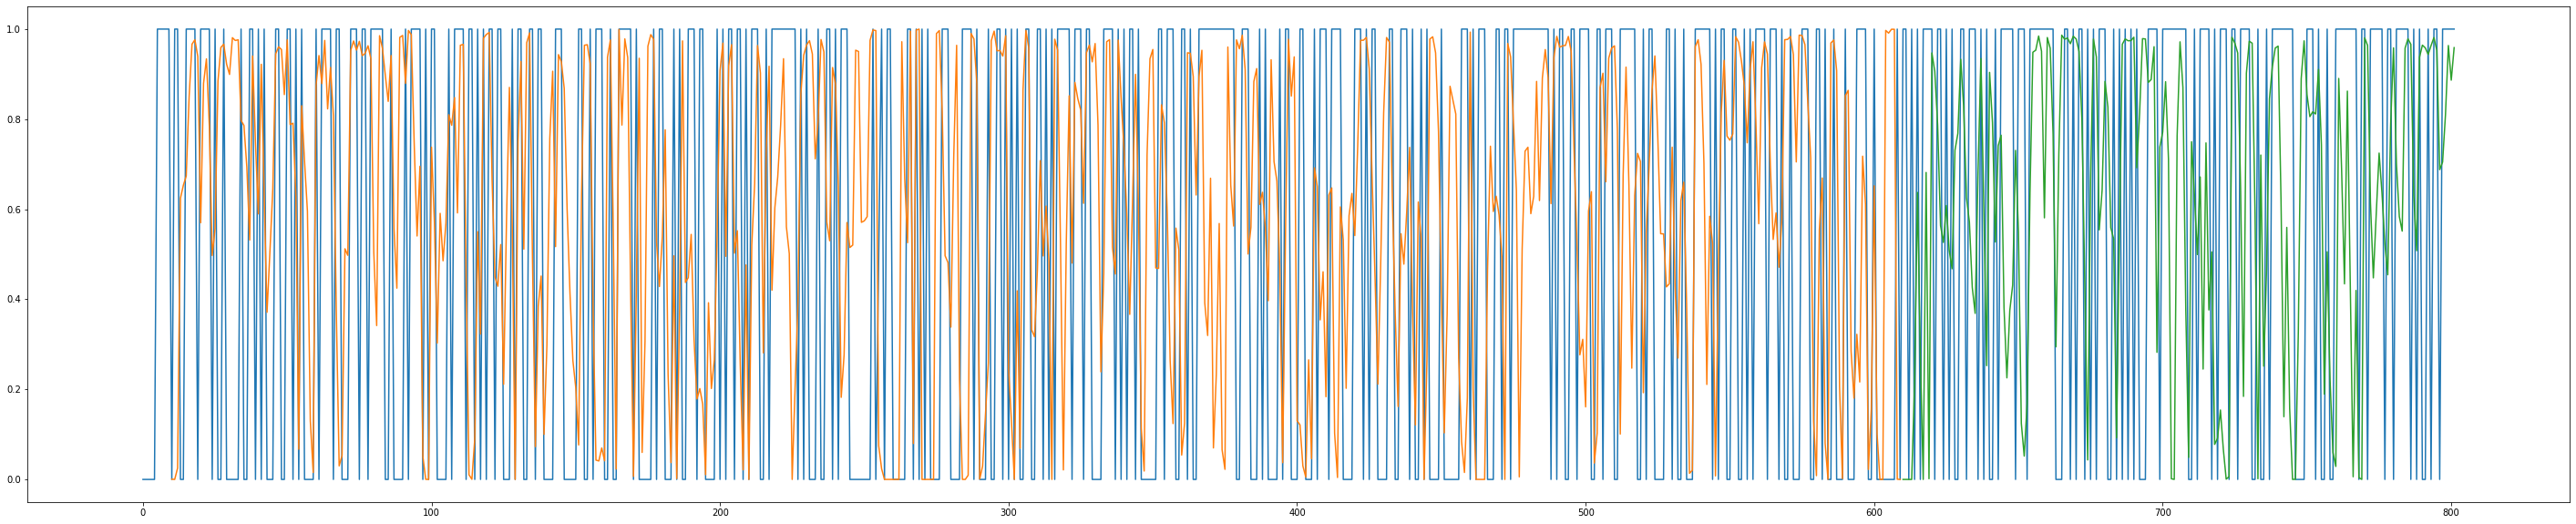

In [139]:
plt.figure(figsize=(50,10))
plt.plot(y)

split = 기준 + 기간
plt.plot(np.arange(기간, split, 1), train_pred ) #트레인값출력
plt.plot(np.arange(split, split +len(test_pred),1), test_pred) #테스트값출력

In [141]:
a=[]

for i in range(len(y_train)):

    if ( (train_pred[i] >0.5 ) & (y_train[i] >0.5) ) |  ( (train_pred[i] <0.5 ) & (y_train[i] <0.5) ):
        a.append(1)


In [142]:
sum(a)/len(y_train) *100

77.66666666666666

# → 감성어방향 예측/ 주가 방향일치 트레인 77%

In [144]:
b=[]

for i in range(len(test_pred)):

    if ( (test_pred[i] >0.5 ) & (y_test[i] >0.5) ) |  ( (test_pred[i] <0.5 ) & (y_test[i] <0.5) ):
        b.append(1)


In [145]:
sum(b)/len(y_test) *100

72.39583333333334

# → 감성어방향 예측/ 주가 방향일치 테스트 72%

In [148]:
# 예측 성능 출력하는 함수 만들기(트레인)

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def 확인결과1(y_train, train_pred):
  MAE= mean_absolute_error(y_train, train_pred)
  RMSE= np.sqrt(mean_squared_error(y_train, train_pred))
#   MSLE= mean_squared_log_error(y_test,  test_pred)
#    RMSLE= np.sqrt(mean_squared_log_error(y_test,  test_pred))
  R2= r2_score(y_train, train_pred)

  pd.options.display.float_format='{:.5f}'.format 
  Result=pd.DataFrame(data=[MAE, RMSE, R2], index=['MAE', 'RMSE', 'R2'], columns=['Results'])
  return Result

확인결과1(y_train, train_pred)

Results
MAE   0.27917
RMSE  0.38678
R2    0.39878

In [150]:
# 예측 성능 출력하는 함수 만들기(테스트)

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

def 확인결과2(y_test, test_pred):
  MAE= mean_absolute_error(y_test, test_pred)
  RMSE= np.sqrt(mean_squared_error(y_test, test_pred))
#   MSLE= mean_squared_log_error(y_test,  test_pred)
#    RMSLE= np.sqrt(mean_squared_log_error(y_test,  test_pred))
  R2= r2_score(y_test, test_pred)

  pd.options.display.float_format='{:.5f}'.format 
  Result=pd.DataFrame(data=[MAE, RMSE, R2], index=['MAE', 'RMSE', 'R2'], columns=['Results'])
  return Result

확인결과2(y_test, test_pred)

Results
MAE   0.32262
RMSE  0.43869
R2    0.17419

-0.33982886006546087


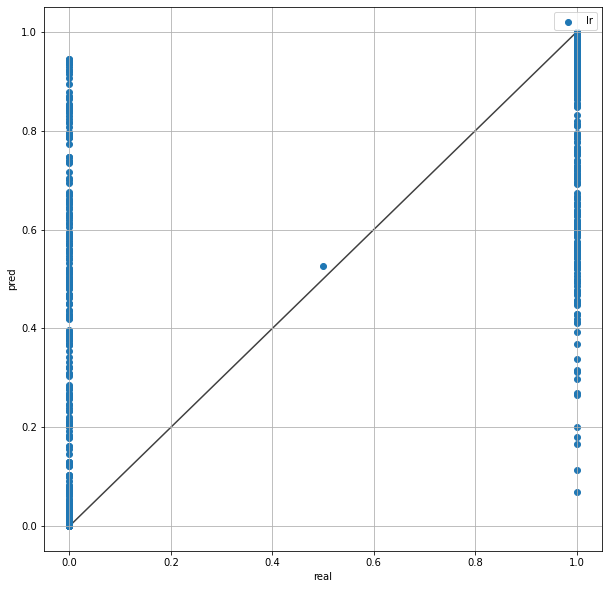

In [152]:
from sklearn.metrics import r2_score


x_pred = [v[0] for v in model.predict(x_train)]


print(r2_score(x_pred , list(y_train)))


score_dict = {
    'dl' : x_pred ,
    'real' : y_train
}

pred_df = pd.DataFrame(score_dict)

lims = [
    np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
    np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(10,10))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(pred_df.real, pred_df.dl, marker='o', label='lr')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()

-0.8235031624803311


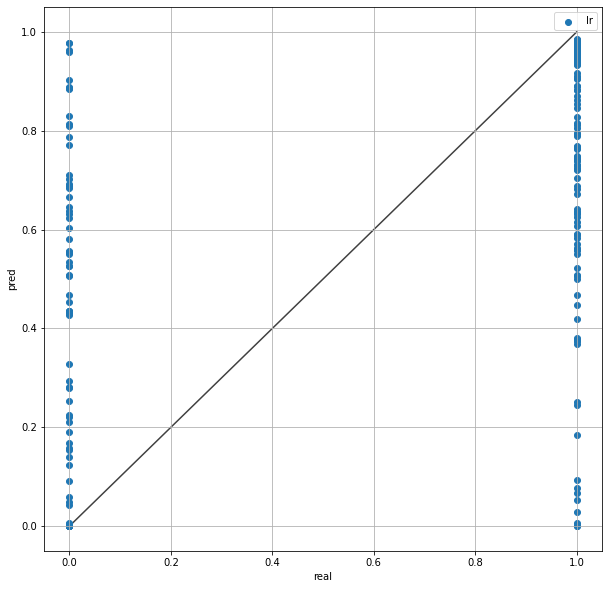

In [153]:
from sklearn.metrics import r2_score


y_pred = [v[0] for v in model.predict(x_test)]


print(r2_score(y_pred, list(y_test)))


score_dict = {
    'dl' : y_pred,
    'real' : y_test
}

pred_df = pd.DataFrame(score_dict)

lims = [
    np.min([pred_df.min().min(), pred_df.min().min()]),  # min of both axes
    np.max([pred_df.max().max(), pred_df.max().max()]),  # max of both axes
]

# now plot both limits against eachother
plt.figure(figsize=(10,10))
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.scatter(pred_df.real, pred_df.dl, marker='o', label='lr')
plt.xlabel('real')
plt.ylabel('pred')
plt.grid()
plt.legend()
plt.show()